In [ ]:
import cv2 
import glob 
import numpy as np
import os
import keras
from tensorflow import keras
import urllib
import pandas as pd
from keras.layers import Input, LSTM, Dense
from keras.models import Model, load_model
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import datetime
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from itertools import chain
import random
import tensorflow_hub as hub
import time


**Read and prepare the dataset**

In [ ]:
# download train 
!curl "https://kfupmedusa-my.sharepoint.com/personal/hluqman_kfupm_edu_sa/_layouts/15/download.aspx?SourceUrl="%"2Fpersonal"%"2Fhluqman"%"5Fkfupm"%"5Fedu"%"5Fsa"%"2FDocuments"%"2FTemp"%"2FICS471"%"2DAssg"%"2D04"%"2Ftrain"%"2Ezip" -H "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:95.0) Gecko/20100101 Firefox/95.0" -H "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8" -H "Accept-Language: ar,en-US;q=0.7,en;q=0.3" -H "Accept-Encoding: gzip, deflate, br" -H "Referer: https://kfupmedusa-my.sharepoint.com/personal/hluqman_kfupm_edu_sa/_layouts/15/onedrive.aspx?id="%"2Fpersonal"%"2Fhluqman"%"5Fkfupm"%"5Fedu"%"5Fsa"%"2FDocuments"%"2FTemp"%"2FICS471"%"2DAssg"%"2D04"%"2Ftrain"%"2Ezip&parent="%"2Fpersonal"%"2Fhluqman"%"5Fkfupm"%"5Fedu"%"5Fsa"%"2FDocuments"%"2FTemp"%"2FICS471"%"2DAssg"%"2D04" -H "DNT: 1" -H "Upgrade-Insecure-Requests: 1" -H "Sec-Fetch-Dest: iframe" -H "Sec-Fetch-Mode: navigate" -H "Sec-Fetch-Site: same-origin" -H "Connection: keep-alive" -H "Cookie: KillSwitchOverrides_enableKillSwitches=; KillSwitchOverrides_disableKillSwitches=; FedAuth=77u/PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiPz48U1A+VjExLDBoLmZ8bWVtYmVyc2hpcHx1cm4lM2FzcG8lM2Fhbm9uI2NlMDhlY2YyYTFhMjk3MDQ2MTM5NjBhNDcxZmMyZDA3NjNmZDFmZGJkZmNmN2E1ZjE2NjdkYzhkMDAzMDRkNzQsMCMuZnxtZW1iZXJzaGlwfHVybiUzYXNwbyUzYWFub24jY2UwOGVjZjJhMWEyOTcwNDYxMzk2MGE0NzFmYzJkMDc2M2ZkMWZkYmRmY2Y3YTVmMTY2N2RjOGQwMDMwNGQ3NCwxMzI4NDYzMzkxNDAwMDAwMDAsMCwxMzI4NDcyMDAxNDg0NzQzNjAsMC4wLjAuMCwyNTgsMjliNGIwODgtZDI3ZC00MTI5LWI5ZjktODYzN2I1OWVhNGIzLCwsNDgzNTBmYTAtMjA5Ny1jMDAwLWFiNzEtZjY4ZWFhMjk4ZGU3LDQ4MzUwZmEwLTIwOTctYzAwMC1hYjcxLWY2OGVhYTI5OGRlNyxkMHN2NWsyWjhrS2FPVzdtcUZUdFhnLDAsMCwwLCwsLDI2NTA0Njc3NDM5OTk5OTk5OTksMCwsLCwsLCwwLFpacWx2Z0Erek5LbHlsSXIwTC9NamlwQ0VMMVNJazNSaExQZGxrVkVhckhHaGlpZnYvcjBDMTgxL2x2Q3lPMVY0N3N3TENFaVpNRFRjTG9BQlY0WFNhQ3dZSVhpc3hRMklyblpnN2VvblYvTnhRWlZuVFU3Q01Vc2hPaWtEc0JiMDhTOFJtQ3NkWi9DS3ZSdU91RlFBOHRhKzNwNFlJSUp0WnUvK0NpNnR0Ulo5bnVJMUkxeWVtWmVDKzNOOWFqNEowOGxZMVVualloVHlYc3phd1hrUTZTNW0zZVV0T1duSnV5NS9wS2Zwa1FXOXN2TjhQallKN2Fudkt3ejZPZUxEM2Nyd2taMERQd1NPT0dSeTdNTWRMc1lvb3c3YU0xYVBsb2VQVWxWNmpPVWVRZkduVDBjc3c0RTRoKytMREhwL1BFMFg0RGxJVll5N0s2cUdrdVBTQT09PC9TUD4=" -o train.zip
# download test
!curl "https://kfupmedusa-my.sharepoint.com/personal/hluqman_kfupm_edu_sa/_layouts/15/download.aspx?SourceUrl="%"2Fpersonal"%"2Fhluqman"%"5Fkfupm"%"5Fedu"%"5Fsa"%"2FDocuments"%"2FTemp"%"2FICS471"%"2DAssg"%"2D04"%"2Ftest"%"2Ezip" -H "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:95.0) Gecko/20100101 Firefox/95.0" -H "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8" -H "Accept-Language: ar,en-US;q=0.7,en;q=0.3" -H "Accept-Encoding: gzip, deflate, br" -H "Referer: https://kfupmedusa-my.sharepoint.com/personal/hluqman_kfupm_edu_sa/_layouts/15/onedrive.aspx?id="%"2Fpersonal"%"2Fhluqman"%"5Fkfupm"%"5Fedu"%"5Fsa"%"2FDocuments"%"2FTemp"%"2FICS471"%"2DAssg"%"2D04"%"2Ftest"%"2Ezip&parent="%"2Fpersonal"%"2Fhluqman"%"5Fkfupm"%"5Fedu"%"5Fsa"%"2FDocuments"%"2FTemp"%"2FICS471"%"2DAssg"%"2D04" -H "DNT: 1" -H "Upgrade-Insecure-Requests: 1" -H "Sec-Fetch-Dest: iframe" -H "Sec-Fetch-Mode: navigate" -H "Sec-Fetch-Site: same-origin" -H "Connection: keep-alive" -H "Cookie: KillSwitchOverrides_enableKillSwitches=; KillSwitchOverrides_disableKillSwitches=; FedAuth=77u/PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiPz48U1A+VjExLDBoLmZ8bWVtYmVyc2hpcHx1cm4lM2FzcG8lM2Fhbm9uI2NlMDhlY2YyYTFhMjk3MDQ2MTM5NjBhNDcxZmMyZDA3NjNmZDFmZGJkZmNmN2E1ZjE2NjdkYzhkMDAzMDRkNzQsMCMuZnxtZW1iZXJzaGlwfHVybiUzYXNwbyUzYWFub24jY2UwOGVjZjJhMWEyOTcwNDYxMzk2MGE0NzFmYzJkMDc2M2ZkMWZkYmRmY2Y3YTVmMTY2N2RjOGQwMDMwNGQ3NCwxMzI4NDYzMzkxNDAwMDAwMDAsMCwxMzI4NDcyMDAxNDg0NzQzNjAsMC4wLjAuMCwyNTgsMjliNGIwODgtZDI3ZC00MTI5LWI5ZjktODYzN2I1OWVhNGIzLCwsNDgzNTBmYTAtMjA5Ny1jMDAwLWFiNzEtZjY4ZWFhMjk4ZGU3LDQ4MzUwZmEwLTIwOTctYzAwMC1hYjcxLWY2OGVhYTI5OGRlNyxkMHN2NWsyWjhrS2FPVzdtcUZUdFhnLDAsMCwwLCwsLDI2NTA0Njc3NDM5OTk5OTk5OTksMCwsLCwsLCwwLFpacWx2Z0Erek5LbHlsSXIwTC9NamlwQ0VMMVNJazNSaExQZGxrVkVhckhHaGlpZnYvcjBDMTgxL2x2Q3lPMVY0N3N3TENFaVpNRFRjTG9BQlY0WFNhQ3dZSVhpc3hRMklyblpnN2VvblYvTnhRWlZuVFU3Q01Vc2hPaWtEc0JiMDhTOFJtQ3NkWi9DS3ZSdU91RlFBOHRhKzNwNFlJSUp0WnUvK0NpNnR0Ulo5bnVJMUkxeWVtWmVDKzNOOWFqNEowOGxZMVVualloVHlYc3phd1hrUTZTNW0zZVV0T1duSnV5NS9wS2Zwa1FXOXN2TjhQallKN2Fudkt3ejZPZUxEM2Nyd2taMERQd1NPT0dSeTdNTWRMc1lvb3c3YU0xYVBsb2VQVWxWNmpPVWVRZkduVDBjc3c0RTRoKytMREhwL1BFMFg0RGxJVll5N0s2cUdrdVBTQT09PC9TUD4=" -o test.zip
url = 'https://raw.githubusercontent.com/Tar-ali/NN/main/groundTruth.txt'




  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3548M  100 3548M    0     0  35.0M      0  0:01:41  0:01:41 --:--:-- 31.2M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  427M  100  427M    0     0  10.2M      0  0:00:41  0:00:41 --:--:-- 22.5M


In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 10

MAX_SEQ_LENGTH = 20
NUM_FEATURES = 2048

In [ ]:
!unzip "/content/test.zip"
!unzip "/content/train.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train/0009/02_0009_(27_02_21_20_43_02)_c/02_0009_(27_02_21_20_43_02)_c_0023.png  
  inflating: train/0009/02_0009_(27_02_21_20_43_02)_c/02_0009_(27_02_21_20_43_02)_c_0024.png  
  inflating: train/0009/02_0009_(27_02_21_20_43_02)_c/02_0009_(27_02_21_20_43_02)_c_0025.png  
  inflating: train/0009/02_0009_(27_02_21_20_43_02)_c/02_0009_(27_02_21_20_43_02)_c_0026.png  
  inflating: train/0009/02_0009_(27_02_21_20_43_02)_c/02_0009_(27_02_21_20_43_02)_c_0027.png  
  inflating: train/0009/02_0009_(27_02_21_20_43_02)_c/02_0009_(27_02_21_20_43_02)_c_0028.png  
  inflating: train/0009/02_0009_(27_02_21_20_43_02)_c/02_0009_(27_02_21_20_43_02)_c_0029.png  
  inflating: train/0009/02_0009_(27_02_21_20_43_02)_c/02_0009_(27_02_21_20_43_02)_c_0030.png  
  inflating: train/0009/02_0009_(27_02_21_20_43_02)_c/02_0009_(27_02_21_20_43_02)_c_0031.png  
  inflating: train/0009/02_0009_(27_02_21_20_43_02)_c/02_0009_(27_02_21_20_43_02)_c_0032.png  

In [ ]:
def readFrames(path): 
 
    # files = glob.glob ("/content/train/0001/01_0001_(10_03_21_20_37_17)_c/*.png")
    files = glob.glob (path)


    frames = []
    for myFile in files:
        # print(myFile)
        image = cv2.imread (myFile)
        image = cv2.resize(image, dsize=(IMG_SIZE, IMG_SIZE))
        # print(image)
        frames.append (image)
    frames = np.array(frames)
    # print(np.array(frames).shape)
    return frames

In [ ]:
def readFramesToV(path): 
 
    # files = glob.glob ("/content/train/0001/01_0001_(10_03_21_20_37_17)_c/*.png")
    files = glob.glob (path)


    frames = []
    for myFile in files:
        # print(myFile)
        image = cv2.imread (myFile)
        image = cv2.resize(image, dsize=(IMG_SIZE, IMG_SIZE))
        # print(image)
        frames.append (image)
    # frames = np.array(frames)
    # print(np.array(frames).shape)
    return frames

In [ ]:
# from numpy.lib.function_base import append
def readVideos(path):

  classList = os.listdir(path)
  videoList = []

  for i in classList:
    path2 = os.path.join(path, i, '*.png')
    # videoList.append((i, readFrames(path2)))
    videoList.append(readFrames(path2))

  videoList = np.array(videoList)

  return videoList, classList

**Word Embedding for ground truth text**

In [ ]:
tag = pd.read_csv(url)
tag = np.array(tag)
tag = tag.tolist()
tag.insert(0, ['اسم الله'])
tagList = tag
tagList = list(chain.from_iterable(tagList))
tag = np.array(tag)

label_processor = keras.layers.StringLookup(
    num_oov_indices=0, vocabulary=np.unique(tag)
)
print(label_processor.get_vocabulary())

embedding = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embedding(tagList)

<tf.Tensor: shape=(10, 512), dtype=float32, numpy=
array([[-0.00927917,  0.05088336,  0.01882795, ...,  0.03789465,
         0.00212601, -0.09657198],
       [ 0.02497953,  0.02376843,  0.00716819, ..., -0.00064139,
         0.02799054, -0.10853755],
       [ 0.05887962, -0.00384432,  0.06718566, ..., -0.02870435,
         0.01809549, -0.08271787],
       ...,
       [-0.00053014,  0.04498343,  0.00270573, ...,  0.06621864,
         0.04841267, -0.11513454],
       [ 0.02625895,  0.03259802, -0.03086848, ...,  0.01725488,
        -0.01372381, -0.09584926],
       [ 0.07491666,  0.01783455, -0.00987978, ..., -0.02071185,
        -0.03108401, -0.09027234]], dtype=float32)>

In [ ]:
def build_feature_extractor():
    InceptionV3_model = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))

    # preprocess the input
    preprocess_input = keras.applications.inception_v3.preprocess_input
    preprocessed = preprocess_input(inputs)

    # extract the features from the preprocessed input
    outputs = InceptionV3_model(preprocessed)

    # form the final model 
    myModel = keras.Model(inputs, outputs, name="feature_extractor")
    
    return myModel


feature_extractor = build_feature_extractor()

In [ ]:
def frameToV(image_folder, out):

  import cv2
  import os

  image_folder = image_folder
  video_name = out + '.avi'

  images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
  frame = cv2.imread(os.path.join(image_folder, images[0]))
  height, width, layers = frame.shape

  video = cv2.VideoWriter(video_name, 0, 1, (width,height))

  for image in images:
      video.write(cv2.imread(os.path.join(image_folder, image)))

  cv2.destroyAllWindows()
  video.release()


# frameV(3, 2)

In [ ]:
def prepare(path):
  # n1 = 1
  # n2 = 1
  # toStope = 0
  count = 0
  path_caption = []
  labels_list = []
  labels = label_processor(tag[..., None]).numpy()
  
  allVideosFeatures = []
  classes = sorted(os.listdir(path))
  print(classes)
  classesList = []

  for video_paths in classes:
    print(video_paths)
    classA = 1
    # if n1 == 3:
    #   break
    # n1 = n1 + 1
    # print(111111111)
    videoE, classList = readVideos(os.path.join(path, video_paths))

    for p in classList:
      caption = "<bos> " + tagList[count] + " <eos>"
      path_caption.append([caption, p])


    for pathF in videoE:
      if classA == 3:
        break
      # if n2 == 3:
      #   break

      # n2 = n2 +1
      # print(2222222222)

      videoFeatures = feature_extractor.predict(pathF, verbose=0)

      allVideosFeatures.append(videoFeatures.squeeze())
      labels_list.append(tag[count])

      print(video_paths, classA, tag[count])
      classA = classA + 1
    count = count + 1

  return np.array(allVideosFeatures), np.array(labels_list), path_caption

In [ ]:
# prepare('/content/train')

train_data, train_labels, path_caption = prepare('/content/train')
test_data, test_labels, path_caption2 = prepare('/content/test')

['0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010']
0001
0001 1 ['اسم الله']
0001 2 ['اسم الله']
0002
0002 1 ['الحمد الله']
0002 2 ['الحمد الله']
0003
0003 1 ['جميع الصم العرب  السامع']
0003 2 ['جميع الصم العرب  السامع']
0004
0004 1 ['السلام عليكم رحمة الله بركة']
0004 2 ['السلام عليكم رحمة الله بركة']
0005
0005 1 ['اليوم اقدم انتم برنامج اخر']
0005 2 ['اليوم اقدم انتم برنامج اخر']
0006
0006 1 ['موضوع دراسة لغة الاشارة العربية']
0006 2 ['موضوع دراسة لغة الاشارة العربية']
0007
0007 1 ['كلمات اليوم متفرقة في الدين']
0007 2 ['كلمات اليوم متفرقة في الدين']
0008
0008 1 ['ايضا كلمات عادية']
0008 2 ['ايضا كلمات عادية']
0009
0009 1 ['لا شرك الله']
0009 2 ['لا شرك الله']
0010
0010 1 ['الله اكبر']
0010 2 ['الله اكبر']
['0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010']
0001
0001 1 ['اسم الله']
0001 2 ['اسم الله']
0002
0002 1 ['الحمد الله']
0002 2 ['الحمد الله']
0003
0003 1 ['جميع الصم العرب  السامع']
0003 2 ['جميع الصم العرب  السامع']
000

In [ ]:
print(train_data.shape)
print(train_labels.shape)
print()

(20, 80, 2048)
(20, 1)



In [ ]:
train_path='/content/train2'
# TRAIN_LABEL_PATH = os.path.join(train_path, 'training_label.json')
# mentioning the train test split
train_split = 0.85
# loading the json file for training

# with open(TRAIN_LABEL_PATH) as data_file:    
#     y_data = json.load(data_file)
y_data = tagList

# train_list contains all the captions with their video ID
# vocab_list contains all the vocabulary from training data
train_list = []
vocab_list = []
n3 = -1
for classes in sorted(os.listdir('/content/train/')):
  n3 = n3 + 1

  videos = sorted(os.listdir(os.path.join('/content/train/', classes + '/')))
  for video in videos:
    # print(video)

    train_list.append(["<bos> " + tagList[n3] + "<eos>", video + '.avi'])

test_list = []
tvocab_list = []
n4 = -1
for classes in sorted(os.listdir('/content/test/')):
  n4 = n4 + 1

  videos = sorted(os.listdir(os.path.join('/content/test/', classes + '/')))
  for video in videos:
    # print(video)

    test_list.append(["<bos> " + tagList[n4] + "<eos>", video + '.avi'])


print(train_list)    
random.shuffle(train_list)
training_list = train_list[:int(len(train_list)*train_split)]
validation_list = train_list[int(len(train_list)*train_split):]
for train in training_list:
    vocab_list.append(train[0])
# Tokenizing the words
tokenizer = Tokenizer(num_words=30)
tokenizer.fit_on_texts(vocab_list)
# print(len(tokenizer.word_index))

random.shuffle(test_list)
testing_list = test_list[:int(len(test_list))]
# validation_list = test_list[int(len(test_list)*test_split):]
for test in testing_list:
    vocab_list.append(test[0])




# x_data = {}
# TRAIN_FEATURE_DIR = os.path.join('training_data', 'feat')
# # Loading all the numpy arrays at once and saving them in a dictionary
# for filename in os.listdir(TRAIN_FEATURE_DIR):
#     f = np.load(os.path.join(TRAIN_FEATURE_DIR, filename))
#     x_data[filename[:-4]] = f
# print(len(training_list))
# print(len(validation_list))
# len(x_data)

[['<bos> اسم الله<eos>', '01_0001_(10_03_21_20_37_17)_c.avi'], ['<bos> اسم الله<eos>', '01_0001_(10_03_21_20_37_21)_c.avi'], ['<bos> اسم الله<eos>', '01_0001_(10_03_21_20_37_24)_c.avi'], ['<bos> اسم الله<eos>', '01_0001_(10_03_21_20_37_29)_c.avi'], ['<bos> اسم الله<eos>', '01_0001_(10_03_21_20_37_33)_c.avi'], ['<bos> اسم الله<eos>', '01_0001_(10_03_21_20_38_50)_c.avi'], ['<bos> اسم الله<eos>', '01_0001_(10_03_21_20_38_54)_c.avi'], ['<bos> اسم الله<eos>', '01_0001_(10_03_21_20_38_57)_c.avi'], ['<bos> اسم الله<eos>', '01_0001_(10_03_21_20_39_01)_c.avi'], ['<bos> اسم الله<eos>', '01_0001_(10_03_21_20_39_05)_c.avi'], ['<bos> اسم الله<eos>', '01_0001_(10_03_21_20_39_09)_c.avi'], ['<bos> اسم الله<eos>', '01_0001_(10_03_21_20_39_13)_c.avi'], ['<bos> اسم الله<eos>', '01_0001_(13_02_21_19_07_51)_c.avi'], ['<bos> اسم الله<eos>', '01_0001_(13_02_21_19_07_57)_c.avi'], ['<bos> اسم الله<eos>', '01_0001_(13_02_21_19_08_04)_c.avi'], ['<bos> اسم الله<eos>', '01_0001_(13_02_21_19_08_07)_c.avi'], ['<bos>

In [ ]:
def fun3 (epochs=100, x_data=train_data, tokenizer=tokenizer, num_decoder_tokens=30,training_list=train_list, batch_size=32, maxlen=6):
    encoder_input_data = []
    decoder_input_data = []
    decoder_target_data = []
    videoId = []
    videoSeq = []
    # separating the videoId and the video captions
    for idx, cap in enumerate(training_list):
        caption = cap[0]
        videoId.append(cap[1])
        videoSeq.append(caption)
    # converting the captions to tokens and padding them to equal sizes
    train_sequences = tokenizer.texts_to_sequences(videoSeq)
    train_sequences = np.array(train_sequences)
    train_sequences = pad_sequences(train_sequences, padding='post',truncating='post', maxlen=maxlen)
    max_seq_length = train_sequences.shape[1]
    filesize = len(train_sequences)
    # X_data = []
    y_data = []
    vCount = 0
    n = 0
    for i in range(epochs):
      for idx in  range(0,filesize):
        n += 1
        # encoder_input_data.append(x_data[videoId[idx]])
        y = to_categorical(train_sequences[idx], num_decoder_tokens)
        decoder_input_data.append(y[:-1])
        decoder_target_data.append(y[1:])
        if n == batch_size:
          encoder_input = train_data
          decoder_input = np.array(decoder_input_data)
          decoder_target = np.array(decoder_target_data)
          encoder_input_data = []
          decoder_input_data = []
          decoder_target_data = []
          n = 0
          yield ([encoder_input, decoder_input], decoder_target)





In [ ]:
train = fun3(batch_size=20, training_list=training_list, x_data=feature_extractor, epochs=30)
# valid = fun3(train_path='training_data',batch_size=320, training_list=validation_list, x_data=x_data, epochs=150)
# test = fun3(batch_size=20, training_list=testing_list, x_data=feature_extractor, epochs=30)

In [ ]:
print(train)

<generator object fun3 at 0x7f5e0648e9d0>


In [ ]:
time_steps_encoder=80
num_encoder_tokens=2048
latent_dim=512
time_steps_decoder=5
num_decoder_tokens=30
batch_size=20
EPOCHS = 5



**Encoder-Eecoder model**

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_inputs (InputLayer)    [(None, 80, 2048)]   0           []                               
                                                                                                  
 decoder_inputs (InputLayer)    [(None, 5, 30)]      0           []                               
                                                                                                  
 endcoder_lstm (LSTM)           [(None, 80, 512),    5244928     ['encoder_inputs[0][0]']         
                                 (None, 512),                                                     
                                 (None, 512)]                                                     
                                                                                            

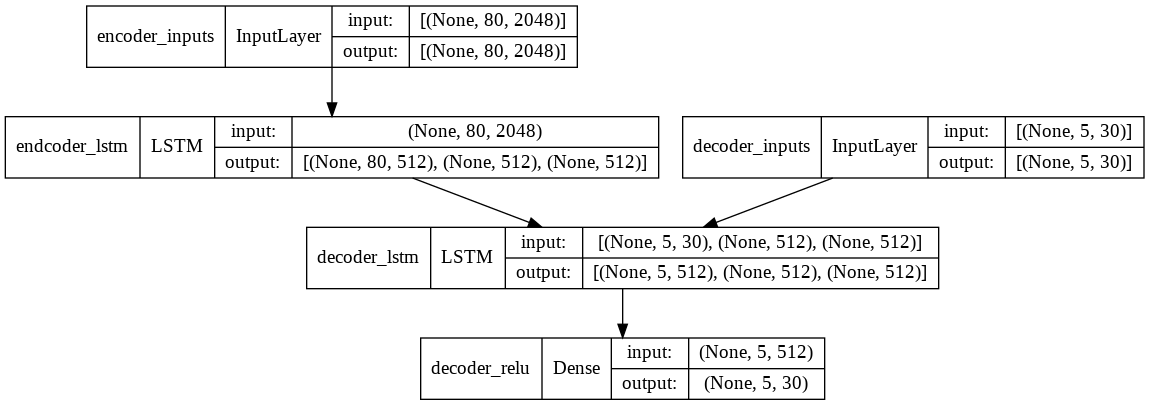

In [ ]:
encoder_inputs = Input(shape=(time_steps_encoder, num_encoder_tokens), name="encoder_inputs")
encoder = LSTM(latent_dim, return_state=True,return_sequences=True, name='endcoder_lstm')
_, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(time_steps_decoder, num_decoder_tokens), name= "decoder_inputs")
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, name='decoder_lstm')
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax', name='decoder_relu')
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()
plot_model(model, to_file='model_train.png', show_shapes=True, show_layer_names=True)

In [ ]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, 80, 2048) <dtype: 'float32'>
(None, 5, 30) <dtype: 'float32'>
(None, 5, 30) <dtype: 'float32'>
encoder_inputs [(None, 80, 2048)] float32
decoder_inputs [(None, 5, 30)] float32
endcoder_lstm (None, 80, 2048) float32
decoder_lstm [(None, 5, 30), (None, 512), (None, 512)] float32
decoder_relu (None, 5, 512) float32


[None, None, None, None, None]

In [ ]:
# Early Stopping
earlystopping = EarlyStopping(monitor='val_loss', patience = 5, verbose=1, mode='min')

# Tensorboard callback
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# Run training
opt = keras.optimizers.Adam(lr = 0.0003)
x = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss", factor=0.1,patience=2,verbose=0,mode="auto")
model.compile(metrics=['accuracy'], optimizer=opt, loss='categorical_crossentropy')




try:
    model.fit(train, validation_steps=0.3,
        epochs=EPOCHS, steps_per_epoch= 100,
            callbacks=[x, tensorboard_callback])
except KeyboardInterrupt:
    print("\nW: interrupt received, stopping")
finally:
    pass


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


Epoch 1/5
100/100 [==============================] - 50s 90ms/step - loss: 2.3014 - accuracy: 0.2879 - lr: 3.0000e-04
Epoch 2/5
100/100 [==============================] - 9s 87ms/step - loss: 1.4928 - accuracy: 0.5548 - lr: 3.0000e-04
Epoch 3/5
100/100 [==============================] - 9s 87ms/step - loss: 0.8684 - accuracy: 0.8196 - lr: 3.0000e-04
Epoch 4/5
100/100 [==============================] - 9s 87ms/step - loss: 0.6224 - accuracy: 0.8364 - lr: 3.0000e-04
Epoch 5/5
100/100 [==============================] - 9s 86ms/step - loss: 0.5259 - accuracy: 0.8362 - lr: 3.0000e-04


In [ ]:
predictions = model.predict(test)

**Encoder-Decoder model with attention**

In [ ]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.enc_units,
                                       return_sequences=True,
                                       return_state=True,                                    recurrent_initializer='glorot_uniform')
def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)
        return output, state
def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.enc_units))

In [ ]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)
def call(self, query, values):
        query_with_time_axis = tf.expand_dims(query, 1)
        score = self.V(tf.nn.tanh(
            self.W1(query_with_time_axis) + self.W2(values)))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.dec_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        self.fc = tf.keras.layers.Dense(vocab_size)
        # used for attention
        self.attention = BahdanauAttention(self.dec_units)
    def call(self, x, hidden, enc_output):
        context_vector, attention_weights = self.attention(hidden, enc_output)
        x = self.embedding(x)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        output, state = self.gru(x)
        output = tf.reshape(output, (-1, output.shape[2]))
        x = self.fc(output)
        return x, state, attention_weights

In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_mean(loss_)

In [ ]:
def train_step(inp, targ, enc_hidden):
    loss = 0
    with tf.GradientTape() as tape:
        enc_output, enc_hidden = encoder(inp, enc_hidden)
        dec_hidden = enc_hidden
        dec_input = tf.expand_dims(train_list* BATCH_SIZE, 1)
        # Teacher forcing - feeding the target as the next input
        for t in range(1, targ.shape[1]):
            # passing enc_output to the decoder
            predictions, dec_hidden, _ = Decoder(dec_input, dec_hidden, enc_output)
            loss += loss_function(targ[:, t], predictions)
            # using teacher forcing
            dec_input = tf.expand_dims(targ[:, t], 1)
    batch_loss = (loss / int(targ.shape[1]))
    variables = encoder.trainable_variables + Decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    return batch_loss

In [ ]:
EPOCHS = 4
for epoch in range(EPOCHS):
    start = time.time()
    enc_hidden = encoder.initialize_hidden_state()
    total_loss = 0
    for (batch, (inp, targ)) in enumerate(training_list):
        batch_loss = train_step(inp, targ, enc_hidden)
        total_loss += batch_loss
        if batch % 1000 == 0:
            print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                       batch,
                                                      batch_loss.numpy()))
    # # saving (checkpoint) the model every 2 epochs
    # if (epoch + 1) % 2 == 0:
    #     checkpoint.save(file_prefix = checkpoint_prefix)
    # print('Epoch {} Loss {:.4f}'.format(epoch + 1,
    #                                   total_loss / steps_per_epoch))
    # print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))